# 作業:
    請嘗試改用CIFAR100

# Import Library

In [3]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

# 資料準備

In [52]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='coarse')

In [41]:
print('train: ', len(x_train))
print('test: ', len(x_test))

train:  50000
test:  10000


In [42]:
x_train.shape

(50000, 32, 32, 3)

In [43]:
y_train.shape

(50000, 1)

In [44]:
x_test.shape

(10000, 32, 32, 3)

In [54]:
y_test.shape

(10000, 1)

In [53]:
y_train[0]

array([11])

In [63]:
import matplotlib.pyplot as plt

label_list = [
    'aquatic mammals',
    'fish',
    'flowers',
    'food containers',
    'fruit and vegetables',
    'household electrical devices',
    'household furniture',
    'insects',
    'large carnivores',
    'large man-made outdoor things',
    'large natural outdoor scenes',
    'large omnivores and herbivores',
    'medium-sized mammals',
    'non-insect invertebrates',
    'people',
    'reptiles',
    'small mammals',
    'trees',
    'vehicles 1',
    'vehicles 2'
]

def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        
        title = str(i) + ', ' + label_list[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_list[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

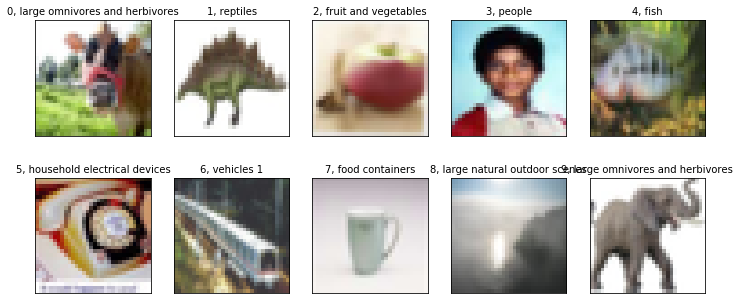

In [65]:
plot_images_labels_prediction(x_train, y_train, [], 0)

# 轉換label 為OneHot Encoding

In [76]:
def normalize(images):
    tmp = images.copy()
    return tmp.astype('float32') / 255

print(x_train[100][0][0])
x_tmp_train = normalize(x_train)
x_tmp_test = normalize(x_test)
print(x_tmp_train[100][0][0])

[151 144  86]
[0.5921569 0.5647059 0.3372549]


In [78]:
from keras.utils import np_utils

def one_hot_encode(labels):
    tmp = labels.copy()
    return np_utils.to_categorical(labels)

print(y_train[:5])
y_tmp_train = one_hot_encode(y_train)
y_tmp_test = one_hot_encode(y_test)
print(y_tmp_train[:5])

[[11]
 [15]
 [ 4]
 [14]
 [ 1]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
